In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
df=pd.read_csv('../data/raw/data.csv')

In [ ]:
print(df.head())
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.info()

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [5]:
# Null values per column
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [6]:
# Summary statistics
df.describe(include='all')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [9]:
# See the exact column names
print(df.columns.tolist())


['transactionid', 'batchid', 'accountid', 'subscriptionid', 'customerid', 'currencycode', 'countrycode', 'providerid', 'productid', 'productcategory', 'channelid', 'amount', 'value', 'transactionstarttime', 'pricingstrategy', 'fraudresult']


In [10]:
df['transactionstarttime'] = pd.to_datetime(df['transactionstarttime'])


In [11]:
df['fraudresult'].value_counts(normalize=True) * 100


fraudresult
0    99.798248
1     0.201752
Name: proportion, dtype: float64

## ⚠️ Class Imbalance Observation

- FraudResult shows severe imbalance: only 0.20% of transactions are fraud.
- This will strongly influence our modeling strategy.
- Accuracy will not be a meaningful metric.
- We will apply techniques like SMOTE or class-weighted models and evaluate using Recall, F1-score, and AUC.


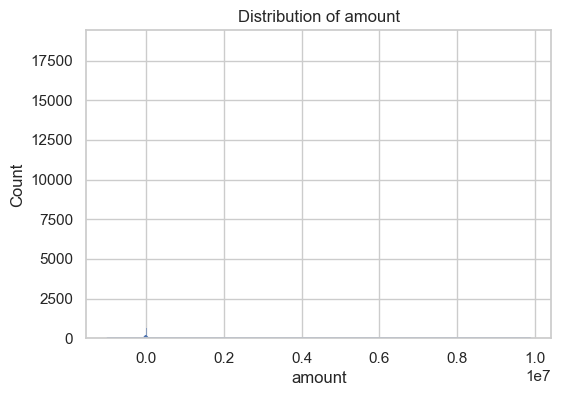

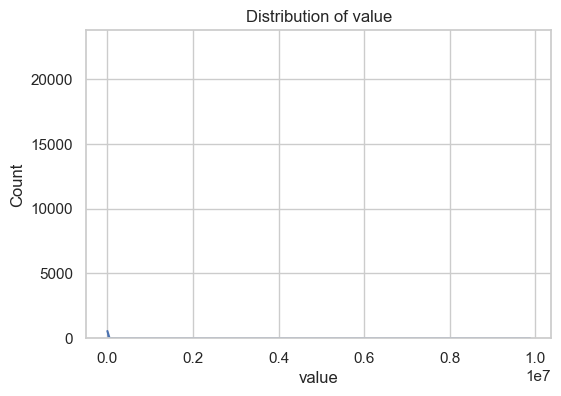

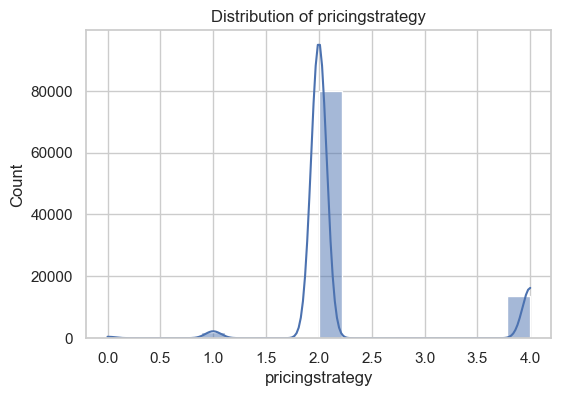

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['amount', 'value', 'pricingstrategy']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


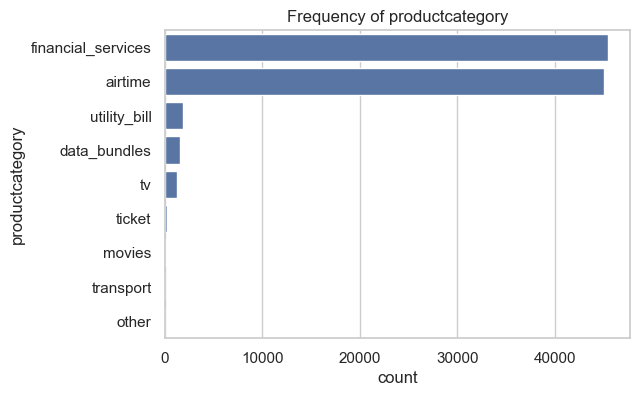

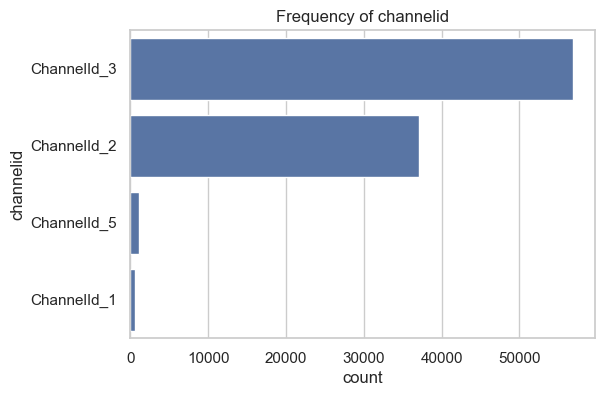

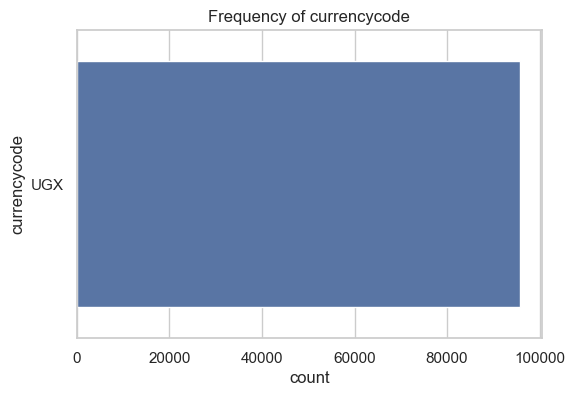

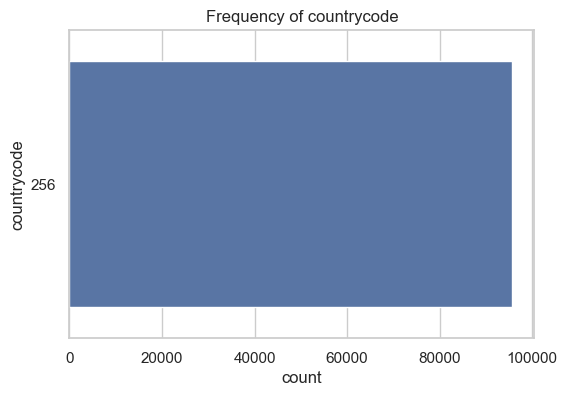

In [13]:
cat_cols = ['productcategory', 'channelid', 'currencycode', 'countrycode']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()


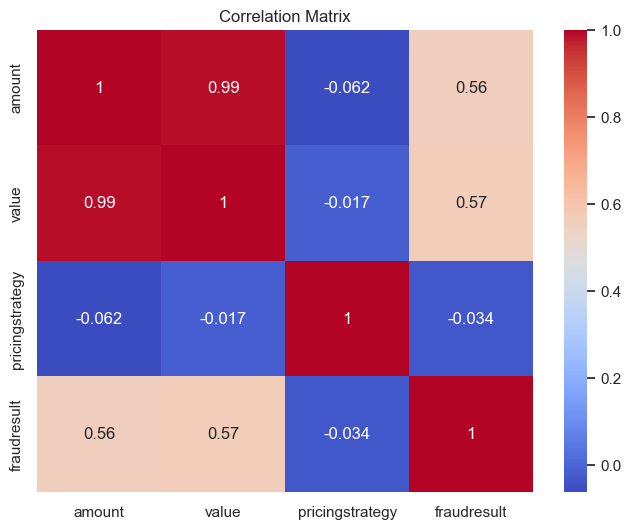

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols + ['fraudresult']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Observations
### Strong Positive Correlation:

Amount and Value: The correlation coefficient is 0.99, indicating a very strong positive relationship. As the amount increases, the value tends to increase almost perfectly.
Weak Correlation:

Amount and Pricing Strategy: The correlation is -0.062, suggesting a very weak negative relationship. Changes in the amount do not significantly affect the pricing strategy.

Value and Pricing Strategy: The correlation is -0.017, indicating almost no relationship between these two variables.
Moderate Positive Correlation:

Amount and Fraud Result: The correlation is 0.56, showing a moderate positive relationship. Higher amounts are somewhat associated with higher fraud results.

Value and Fraud Result: The correlation is 0.57, also indicating a moderate positive relationship, suggesting that as value increases, the likelihood of fraud may increase as well.

Pricing Strategy and Fraud Result: The correlation is -0.034, which indicates a negligible relationship between pricing strategy and fraud result.

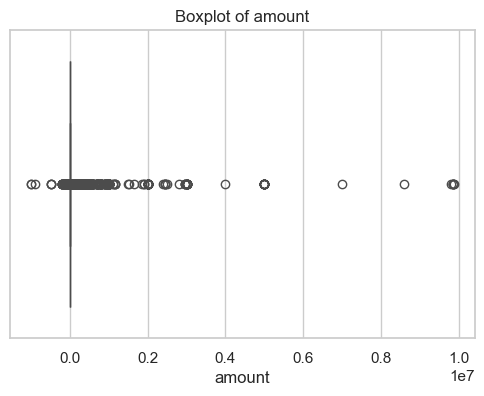

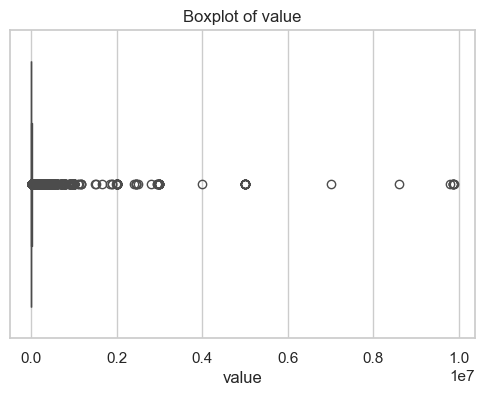

In [15]:
for col in ['amount', 'value']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [16]:
df['hour'] = df['transactionstarttime'].dt.hour
df['dayofweek'] = df['transactionstarttime'].dt.dayofweek
df['day'] = df['transactionstarttime'].dt.day


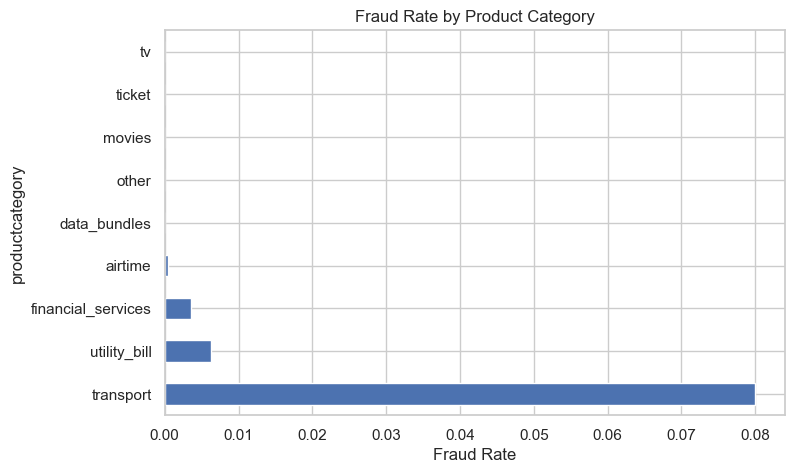

In [17]:
# Example: Fraud rate by product category
fraud_rate_by_cat = df.groupby('productcategory')['fraudresult'].mean().sort_values(ascending=False)
fraud_rate_by_cat.plot(kind='barh', figsize=(8,5), title="Fraud Rate by Product Category")
plt.xlabel("Fraud Rate")
plt.show()


## 🔍 EDA Summary

- The dataset is clean with no major missing values.
- `fraudresult` is extremely imbalanced (~0.2% fraud).
- `value` and `amount` are highly skewed; log transform helps.
- Most transactions fall under PricingStrategy = 2.
- Categorical features like `productcategory` and `channelid` may have different fraud rates.
- Extracted `hour`, `day`, `weekday` from timestamp for temporal analysis.

These findings will guide our feature engineering and modeling strategies.
